#  어핀 변환(Affine Transform) 
- 평행 이동, 확대 및 축소, 회전, 스케일 변경, 뒤틀기 등 다양한 방식으로 변환할 수 있게 해주는 기법. 
- 이 과정에서 이미지의 병렬성은 유지되지만, 각도와 크기는 변할 수 있음
    - 영상에 어파인 변환을 적용할 경우 직선은 그대로 직선으로 나타나고,
    - 직선 간의 길이 비율과 평행 관계가 그대로 유지된다.
    - 직사각형 형태의 영상은 어파인 변환에 의해 평행사변형에 해당하는 모습으로 변경된다.

- 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업     
  
1. 어파인 변환 행렬 구하기
    - 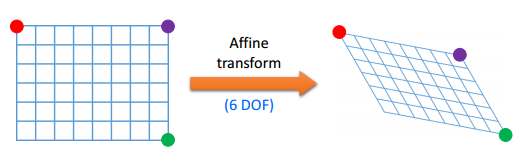
    - `martix = cv2.getAffineTransform(pts1, pts2)`
        - pts1: 변환 전 영상의 좌표 3개, 3 x 2 배열
        - pts2: 변환 후 영상의 좌표 3개, 3 x 2 배열
        - matrix: 변환 행렬 반환, 2 x 3 행렬        
 
2. 어파인 변환하기 
    - warpAffine() : src 영상을 어파인 변환하여 dst 영상을 생성하는 함수  
    - `cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None) -> dst`     
        • src: 입력 영상   
        • M: 2x3 어파인 변환 행렬. 실수형.    
        • dsize: 결과 영상 크기. (w, h) 튜플. (0, 0)이면 src와 같은 크기로 설정. 
        • dst: 출력 영상 
        • flags: 보간법. 기본값은 cv2.INTER_LINEAR. 
        • borderMode: 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT.    
        • borderValue: cv2.BORDER_CONSTANT일 때 사용할 상수 값. 기본값은 0(검정색).     

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

file_name = '../cv_images/fish.png'
img = cv2.imread(file_name)

rows, cols = img.shape[:2]

# ① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

# ② 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1,pts2)  # 코드입력

# ③ 어핀 변환 적용
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows ))  # 코드입력  #   변환된 이미지 크기 : (int(cols*1.5), rows)

cv2.imshow('origin',img)
cv2.imshow('affin', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()